<h1>Лабораторна робота №4 </h1>
<h1>Гаврилюк Р.В</h1>
<h1>БС-82</h1>
<h1>Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка</h1>


<h2>1.Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.</h2>






In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
df = pd.DataFrame(
    {
        'Norm_1': np.random.normal(loc=10, scale=5, size=20),
        'Norm_2': np.random.standard_normal(size=20),
        'Norm_3': np.random.randn(20),
        'Log': np.random.logistic(loc=3, scale=7, size=20),
        'Gamma'   : np.random.gamma(shape=1,size=20),
        'Uniform' : np.random.uniform(size=20),
    }
)
df

,Norm_1,Norm_2,Norm_3,Log,Gamma,Uniform
0,12.947649,-0.568048,-0.864848,-4.412171,2.349426,0.282271
1,14.783769,1.343788,0.927028,5.623230,0.322738,0.408764
2,8.822696,-1.014633,-0.041769,27.915534,0.025700,0.206279
3,11.474026,0.262768,0.700156,18.300750,0.671964,0.641441
4,12.218256,-0.161775,1.007308,3.177739,0.317794,0.791030
5,11.251136,-1.533620,-0.491714,25.094328,1.056313,0.344817
6,17.933885,-0.603088,-1.220590,-32.192715,0.066582,0.400543
7,9.171718,-1.011865,0.856450,9.755943,0.084100,0.758180
8,13.473232,-0.119862,-0.129772,13.148094,0.371454,0.742422
9,13.037077,0.235591,1.041616,4.309607,0.683464,0.890689


<h2>2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
Детальний опис роботи критерію та приклад його розрахунку (с. 606):
https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf</h2>



In [3]:
df = pd.DataFrame({key: sorted(values) for key, values in df.transpose().iterrows()})
df.head()

,Norm_1,Norm_2,Norm_3,Log,Gamma,Uniform
0,1.094708,-1.533620,-2.109606,-32.192715,0.025700,0.022686
1,3.379445,-1.220981,-1.374951,-28.571696,0.052845,0.041683
2,3.600944,-1.014633,-1.220590,-18.575447,0.066582,0.206279
3,7.743411,-1.011865,-1.144252,-11.988798,0.084100,0.282271
4,8.559180,-0.924526,-0.927430,-4.412171,0.246969,0.344817


In [4]:
def get_ser(array,n):
    alll=0
    for i in range(n):
        alll+=array[i]
    return alll/n
mean_data = {i: get_ser(df[i],20) for i in df}

In [5]:
def get_ser_kv(array,n, mean_):
    p=0
    for i in range(n):
        p+=((array[i]-mean_)**2)
    return p
s_sq = {i: get_ser_kv(df[i],20,mean_data[i]) for i in df}

In [6]:
a=[0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]

def get_b(array,n):
    m=0
    for i in range(n//2):
        m+=(a[i]*(array[(n-1)-i]-array[i]))
    return m
    

b = {i: get_b(df[i],20) for i in df}

In [7]:
def get_W(b_v, s_sqq_):
    return (b_v**2)/s_sqq_

W = {i: get_W(b[i], s_sq[i]) for i in df}

WTheory = sts.shapiro(df['Norm_1'])
W, WTheory

({'Norm_1': 0.9542017362168912,
  'Norm_2': 0.9538451022022473,
  'Norm_3': 0.9611162996069582,
  'Log': 0.9435543816085773,
  'Gamma': 0.8036943443388611,
  'Uniform': 0.9123652728274793},
 (0.9541119337081909, 0.4338345527648926))

<h2>3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.
Шаблон таблиці:
https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing</h2>

In [8]:
col = ["Variable", "Statistics", "Distribution"]
data_df = pd.DataFrame(columns = col)
data_df

,Variable,Statistics,Distribution


<h2>4. Занести в стовпчик Variable назви змінних.</h2>

In [9]:
data_df["Variable"] = df.keys()
data_df

,Variable,Statistics,Distribution
0,Norm_1,NaN,NaN
1,Norm_2,NaN,NaN
2,Norm_3,NaN,NaN
3,Log,NaN,NaN
4,Gamma,NaN,NaN
5,Uniform,NaN,NaN


<h2>5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".</h2>

In [14]:
def calibration(value,theory):
    if(value >= theory):
        l = 'normal'
    else:
        l = 'non-normal'
    return l


data_df["Distribution"] = [(calibration(W[i],WTheory[0]))for i in data_df["Variable"]]

data_df

,Variable,Statistics,Distribution
0,Norm_1,11.362580942864188 [8.756817279009717;...,normal
1,Norm_2,-0.1445120628323302 [-0.68344796097797...,non-normal
2,Norm_3,-0.2870590518780665 [-0.88049387024345...,normal
3,Log,5.284984403284777 [-3.9679541408839407...,non-normal
4,Gamma,0.6777141168209504 [0.3000874191631271...,non-normal
5,Uniform,0.6985874860938499 [0.3866115054675981...,non-normal


<h2>6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].</h2>



In [11]:
for i in range (data_df.shape[0]):
    var = data_df["Variable"][i]
    if 'normal' in var:
        data_df["Statistics"][i] = f'{df[var].mean()} [{df[var].std()}]'

data_df

,Variable,Statistics,Distribution
0,Norm_1,NaN,normal
1,Norm_2,NaN,non-normal
2,Norm_3,NaN,normal
3,Log,NaN,non-normal
4,Gamma,NaN,non-normal
5,Uniform,NaN,non-normal


<h2>7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].</h2>

In [12]:
for i in range (data_df.shape[0]):
    var = data_df["Variable"][i]
    if 'normal' not in var:
        data_df["Statistics"][i] = \
        f'{df[var].median()} \
        [{df[var].quantile(0.25)}; {df[var].quantile(0.75)}]'

data_df

,Variable,Statistics,Distribution
0,Norm_1,11.362580942864188 [8.756817279009717;...,normal
1,Norm_2,-0.1445120628323302 [-0.68344796097797...,non-normal
2,Norm_3,-0.2870590518780665 [-0.88049387024345...,normal
3,Log,5.284984403284777 [-3.9679541408839407...,non-normal
4,Gamma,0.6777141168209504 [0.3000874191631271...,non-normal
5,Uniform,0.6985874860938499 [0.3866115054675981...,non-normal


<h2>8. Зберегти таблицю в пдф форматі.</h2>

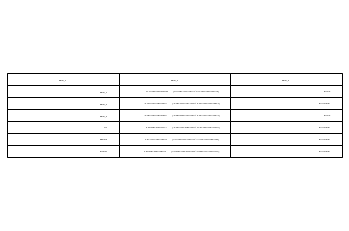

In [13]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
fig = plt.figure()
ax=fig.add_subplot(111)

cell_text = []
for row in range(len(data_df)):
    cell_text.append(data_df.iloc[row])

ax.table(cellText=cell_text, colLabels=df.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
pdf.savefig(fig)
pdf.close()